In [6]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import glob, os
import pandas as pd
import matplotlib.ticker as mtick
from tikzplotlib import save as savetikz
from scipy import ndimage as nd
mk = ['o','s','v','d','x']
import matplotlib.patches as patches
import pickle, dill

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../2023_PMMH_Dshape/')

from dshape_fastcam import caso_exp,density_mylar,flex_rig,frec_nat
from dshape_force import caso_exp_force
from dshape_hotwire import hotwire_exp

cks = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib.lines import Line2D
mks = ['o','s','^','d','<','>']
import CoolProp as cp
cmap = plt.get_cmap("tab10")
lst = np.array(['solid','dashed','dotted','dashdot'])
plt.rcParams["figure.figsize"]=(3,2)
import matplotlib.patches as mpatches
dirout ='tikz_imgs/'
dirout2 ='tikz_imgs/'

dirdata = '../2023_PMMH_Dshape/'

In [7]:
freq1, U1 = [np.arange(10,70,10),np.array([2.2,4.8,7.4,9.95,12.50,15])] 
freq2, U2 = [np.arange(20,70,10),np.array([4.18,6.40,8.50,10.60,12.65])] 
p1 = np.polyfit(freq1,U1,1)
p2 = np.polyfit(freq2,U2,1)
Uf1 = np.poly1d(p1)
Uf2 = np.poly1d(p2)
D = 20e-3
rho_a = cp.CoolProp.PropsSI('D','T',273+25,'P',101.3e3,'Air')
mu_a = cp.CoolProp.PropsSI('V','T',273+25,'P',101.3e3,'Air')
nu_a = mu_a/rho_a
Long_cyl = 200e-3
#D,L = [12e-3, 200e-3]
Af_cyl = D*Long_cyl

In [8]:
data_force = pd.read_pickle(dirdata+'Force/data_total.pkl')
CD = data_force.iloc[:,4].to_numpy()

Re= data_force['Re'].to_numpy()
B = data_force['$B$'].to_numpy()
Bs = np.unique(B)
ts = np.unique(data_force['$t$'])[1:]*1e-6
rho_s = np.unique(data_force.iloc[:,-1])[1:]
L = data_force.iloc[:,1]*D
Ls = np.unique(L)
x1,y1 = np.array([[6307,7426,8728,9264],[0.21,0.28,0.312,0.317]])
ip1 = np.polyfit(x1,y1,2)
p1 = np.poly1d(ip1)
indices_out = np.nonzero(np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<0.4).to_numpy())
#data_force = data_force = data_force.drop(axis=0,index=indices_out[0])
indices_out1 = np.nonzero(np.logical_and(np.logical_and(B == Bs[1],L == Ls[-2]),CD<0.53).to_numpy())
indices_out3 = np.nonzero(np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<p1(Re)).to_numpy())
indices_out2 = np.nonzero(Re<6100)
indices_out4 = np.nonzero(np.logical_and(Re>1.4e4,  np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<0.36)).to_numpy())
indices_out = np.hstack((indices_out1[0],indices_out2[0],indices_out3[0],indices_out4[0]))
indices_out5 = np.nonzero(np.logical_and(np.logical_and(np.logical_and(B == Bs[2],L == Ls[1]),
                                                        np.abs(Re-11100)<1900),CD>0.61).to_numpy())
indices_out6 = np.nonzero(np.logical_and(np.logical_and(np.logical_and(B == Bs[2],L == Ls[4]),
                                                        np.abs(Re-11700)<700),CD>0.4).to_numpy())
data_force.iloc[indices_out5[0],4] =  data_force.iloc[indices_out5[0],4] -0.04
data_force.iloc[indices_out6[0],4] =  data_force.iloc[indices_out6[0],4] -0.03

data_force = data_force.drop(axis=0,index=indices_out)
B = data_force['$B$'].to_numpy()
Bs = np.unique(B)



## Strouhal Study

In [10]:
A0 = pd.read_excel(dirdata+'strouhal_L_t.xlsx',sheet_name='ref')
A1 = pd.read_excel(dirdata+'strouhal_L_t.xlsx',sheet_name='L100')
A2 = pd.read_excel(dirdata+'strouhal_L_t.xlsx',sheet_name='L125')
A3 = pd.read_excel(dirdata+'strouhal_L_t.xlsx',sheet_name='L150')
A4 = pd.read_excel(dirdata+'strouhal_L_t.xlsx',sheet_name='L132')

U0 = Uf2(A0['rpm'])
U1 = Uf2(A1['rpm'])
U2 = Uf2(A2['rpm'])
U3 = Uf2(A3['rpm'])
U4 = Uf2(A4['rpm'])
L1,L2,L3,L4 = np.array([1.00,1.25,1.50,1.32])*D
freq0 = A0['freqs']
St0 = freq0*D/U0
Re0 = U0*D/nu_a


Re1 = U1*D/nu_a
freq1_027 = A1['0.27']
freq1_057 = A1['0.57']
freq1_103 = A1['1.03']
B_027,B_057,B_103 = Bs[1:]

St1_027 = freq1_027*D/U1
St1_057 = freq1_057*D/U1
St1_103 = freq1_103*D/U1




Re2 = U2*D/nu_a
freq2_027 = A2['0.27']
freq2_057 = A2['0.57']
freq2_103 = A2['1.03']

St2_027 = freq2_027*D/U2
St2_057 = freq2_057*D/U2
St2_103 = freq2_103*D/U2


Re3 = U3*D/nu_a
freq3_027 = A3['0.27']
freq3_057 = A3['0.57']
freq3_103 = A3['1.03']

St3_027 = freq3_027*D/U3
St3_057 = freq3_057*D/U3
St3_103 = freq3_103*D/U3

Re4 = U4*D/nu_a
freq4_057 = A4['0.57']
St4_057 = freq4_057*D/U4


Ca1_027 = (rho_a*U1**2*D*L1/B_027)
Ca1_057 = (rho_a*U1**2*D*L1/B_057)
Ca1_103 = (rho_a*U1**2*D*L1/B_103)
Ca2_027 = (rho_a*U2**2*D*L2/B_027)
Ca2_057 = (rho_a*U2**2*D*L2/B_057)
Ca2_103 = (rho_a*U2**2*D*L2/B_103)
Ca3_027 = (rho_a*U3**2*D*L3/B_027)
Ca3_057 = (rho_a*U3**2*D*L3/B_057)
Ca3_103 = (rho_a*U3**2*D*L3/B_103)



masa_a = rho_a*np.pi/4*Ls[1:]*ts[0]

masas_27 = rho_s[0]*ts[0]*Ls[1:]
betas_27 = masa_a / (masa_a+masas_27)

### Ca1_027,Ca1_057,Ca1_103,Ca2_027,Ca2_057,Ca2_103,Ca3_027,Ca3_057,Ca3_103

In [13]:
condition = np.logical_and(data_force['$t$']==57,data_force['$\ell$ $/$ $D$']==1.0)
fn1_057 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==28,data_force['$\ell$ $/$ $D$']==1.0)
fn1_027 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==103,data_force['$\ell$ $/$ $D$']==1.0)
fn1_103 = data_force[condition]['$f_n$'].iloc[2]
fn1_027,fn1_057,fn1_103

condition = np.logical_and(data_force['$t$']==57,data_force['$\ell$ $/$ $D$']==1.25)
fn2_057 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==28,data_force['$\ell$ $/$ $D$']==1.25)
fn2_027 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==103,data_force['$\ell$ $/$ $D$']==1.25)
fn2_103 = data_force[condition]['$f_n$'].iloc[2]
fn2_027,fn2_057,fn2_103

condition = np.logical_and(data_force['$t$']==57,data_force['$\ell$ $/$ $D$']==1.5)
fn3_057 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==28,data_force['$\ell$ $/$ $D$']==1.5)
fn3_027 = data_force[condition]['$f_n$'].iloc[2]
condition = np.logical_and(data_force['$t$']==103,data_force['$\ell$ $/$ $D$']==1.5)
fn3_103 = data_force[condition]['$f_n$'].iloc[2]
fn3_027,fn3_057,fn3_103;



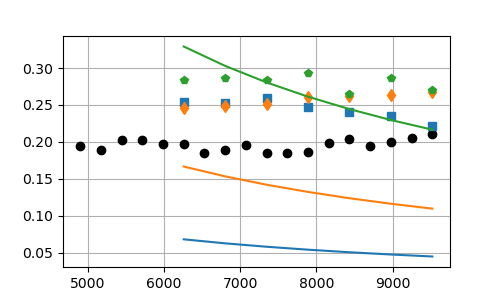

In [14]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(Re0,St0,'ko')
lin1, = ax.plot(Re1,St1_027,'s')
ax.plot(Re1,Re1*0+fn1_027*D/U1,color=lin1.get_color())
lin2, = ax.plot(Re1,St1_057,'d')
ax.plot(Re1,Re1*0+fn1_057*D/U1,color=lin2.get_color())
lin3, = ax.plot(Re1,St1_103,'p')
ax.plot(Re1,Re1*0+fn1_103*D/U1,color=lin3.get_color())

ax.grid()
#ax.set_ylim([0,0.25])

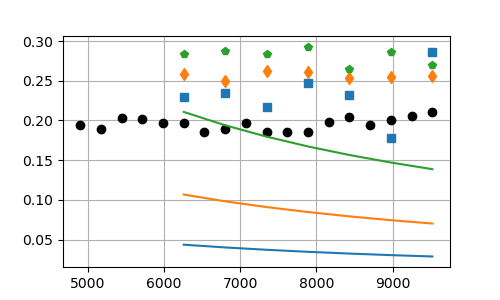

In [15]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(Re0,St0,'ko')
lin1, = ax.plot(Re2,St2_027,'s')
ax.plot(Re2,Re2*0+fn2_027*D/U1,color=lin1.get_color())
lin2, = ax.plot(Re1,St2_057,'d')
ax.plot(Re2,Re2*0+fn2_057*D/U1,color=lin2.get_color())
lin3, = ax.plot(Re1,St1_103,'p')
ax.plot(Re2,Re2*0+fn2_103*D/U1,color=lin3.get_color())

ax.grid()
#ax.set_ylim([0,0.25])

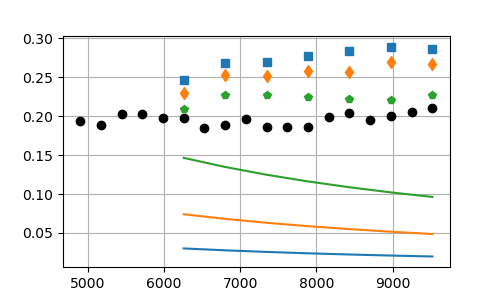

In [16]:
fig,ax = plt.subplots(figsize=(5,3))

ax.plot(Re0,St0,'ko')
lin1, = ax.plot(Re3,St3_027,'s')
ax.plot(Re3,Re3*0+fn3_027*D/U3,color=lin1.get_color())
lin2, = ax.plot(Re3,St3_057,'d')
ax.plot(Re3,Re3*0+fn3_057*D/U3,color=lin2.get_color())
lin3, = ax.plot(Re3,St3_103,'p')
ax.plot(Re3,Re3*0+fn3_103*D/U3,color=lin3.get_color())
ax.grid()
#ax.set_ylim([0,0.25])

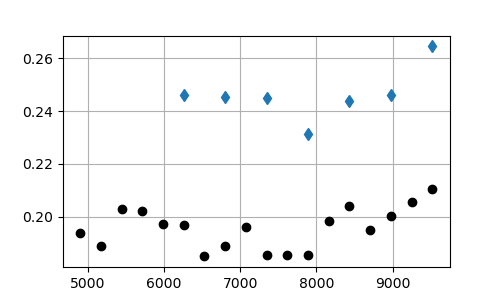

In [17]:
fig,ax = plt.subplots(figsize=(5,3))
ax.plot(Re0,St0,'ko')
ax.plot(Re4,St4_057,'d')
ax.grid()

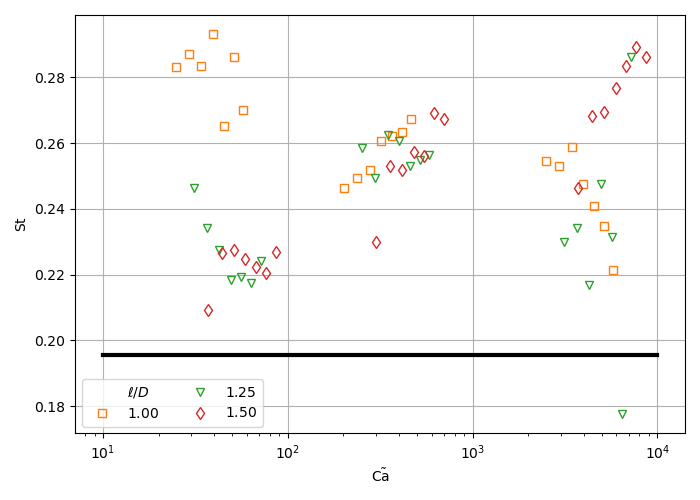

In [18]:
fig,ax = plt.subplots(figsize=(7,5))

ax.semilogx(Ca1_027,St1_027,color='tab:orange',marker='s',linestyle='none',fillstyle='none',label='$1.00$')
ax.semilogx(Ca1_057,St1_057,color='tab:orange',marker='s',linestyle='none',fillstyle='none')
ax.semilogx(Ca1_103,St1_103,color='tab:orange',marker='s',linestyle='none',fillstyle='none')

ax.semilogx(Ca2_027,St2_027,color='tab:green',marker='v',linestyle='none',fillstyle='none',label='$1.25$')
ax.semilogx(Ca2_057,St2_057,color='tab:green',marker='v',linestyle='none',fillstyle='none')
ax.semilogx(Ca2_103,St2_103,color='tab:green',marker='v',linestyle='none',fillstyle='none')

ax.semilogx(Ca3_027,St3_027,color='tab:red',marker='d',linestyle='none',fillstyle='none',label='$1.50$')
ax.semilogx(Ca3_057,St3_057,color='tab:red',marker='d',linestyle='none',fillstyle='none')
ax.semilogx(Ca3_103,St3_103,color='tab:red',marker='d',linestyle='none',fillstyle='none')

Ca0 = np.linspace(1,4,len(St0.to_numpy()))

ax.semilogx(10**(Ca0),St0.to_numpy().mean()+10**(Ca0)*0,'k-',linewidth=3)

handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels
empty_patch = mpatches.Patch(color='none', label='Extra label') # create a patch with no color

handles.insert(0,empty_patch)  # add new patches and labels to list
#handles.insert(1,empty_patch)  # add new patches and labels to list

labels.insert(0, "$\ell/D$")
#labels.insert(1, "")

ax.legend(handles, labels,ncols=2) # apply new handles and labels to plot


ax.grid()

ax.set_xlabel(r'$\tilde {\mathrm{Ca}}$')
ax.set_ylabel('$\mathrm{St}$')
fig.tight_layout()
savetikz(dirout+f'Cauchy_St.tikz')

In [21]:
St1_027_s = fn1_027*D/U1
St1_057_s = fn1_057*D/U1
St1_103_s = fn1_103*D/U1

St2_027_s = fn2_027*D/U2
St2_057_s = fn2_057*D/U2
St2_103_s = fn2_103*D/U2

St3_027_s = fn3_027*D/U3
St3_057_s = fn3_057*D/U3
St3_103_s = fn3_103*D/U3

In [22]:
St1_027_s/St1_027

0    0.266982
1    0.247058
2    0.223687
3    0.217801
4    0.209530
5    0.201864
6    0.201864
Name: 0.27, dtype: float64

Text(0, 0.5, '$\\mathrm{St_s}/St$')

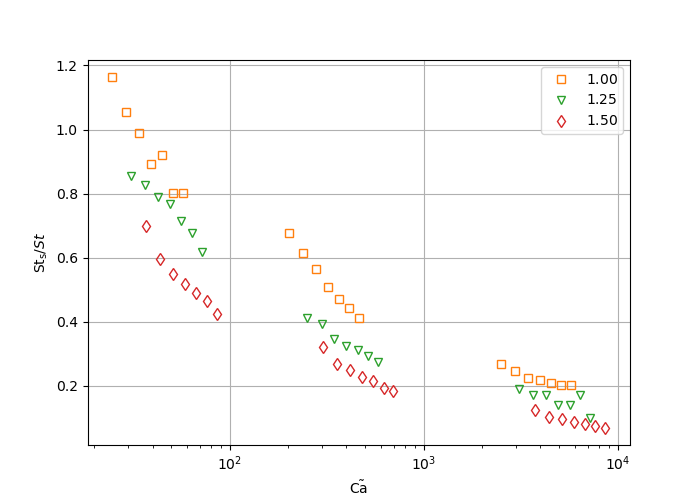

In [23]:
fig,ax = plt.subplots(figsize=(7,5))

plot1 = ax.plot(Ca1_027,St1_027_s/St1_027.to_numpy(),color='tab:orange',marker='s',linestyle='none',fillstyle='none')
plot1[0].set_label(f'$1.00$')
ax.plot(Ca1_057,St1_057_s/St1_057.to_numpy(),color='tab:orange',marker='s',linestyle='none',fillstyle='none')
ax.plot(Ca1_103,St1_103_s/St1_103.to_numpy(),color='tab:orange',marker='s',linestyle='none',fillstyle='none')

ax.plot(Ca2_027,St2_027_s/St2_027.to_numpy(),color='tab:green',marker='v',linestyle='none',fillstyle='none',label='$1.25$')
ax.plot(Ca2_057,St2_057_s/St2_057.to_numpy(),color='tab:green',marker='v',linestyle='none',fillstyle='none')
ax.plot(Ca2_103,St2_103_s/St2_103.to_numpy(),color='tab:green',marker='v',linestyle='none',fillstyle='none')

ax.plot(Ca3_027,St3_027_s/St3_027.to_numpy(),color='tab:red',marker='d',linestyle='none',fillstyle='none',label='$1.50$')
ax.plot(Ca3_057,St3_057_s/St3_057.to_numpy(),color='tab:red',marker='d',linestyle='none',fillstyle='none')
ax.plot(Ca3_103,St3_103_s/St3_103.to_numpy(),color='tab:red',marker='d',linestyle='none',fillstyle='none')

Ca0 = np.linspace(1,4,len(St0.to_numpy()))

#ax.semilogx(10**(Ca0),St0.to_numpy().mean()+10**(Ca0)*0,'k-',linewidth=3)

#handles, labels = plt.gca().get_legend_handles_labels() # get existing handles and labels
#empty_patch = mpatches.Patch(color='none', label='Extra label') # create a patch with no color

#handles.insert(0,empty_patch)  # add new patches and labels to list
#handles.insert(1,empty_patch)  # add new patches and labels to list

#labels.insert(0, "$\ell/D$")
#labels.insert(1, "")

#ax.legend() # apply new handles and labels to plot
ax.legend()
ax.set_xscale('log')
ax.grid()

ax.set_xlabel(r'$\tilde {\mathrm{Ca}}$')
ax.set_ylabel('$\mathrm{St_s}/St$')
#fig.tight_layout()
#savetikz(dirout+f'Cauchy_St2.tikz')
#savetikz(dirout2+f'Cauchy_St2.tikz')

In [15]:
St1_027.to_numpy()

array([0.25450515, 0.25306893, 0.25884081, 0.24753281, 0.24072889,
       0.2347485 , 0.22135241])

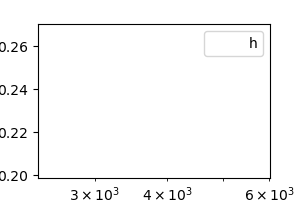

In [56]:
fig,ax = plt.subplots()
x1 = Ca1_027
y1 = 1/St1_027.to_numpy()*St1_027_s
ax.semilogx(x1,y1,linestyle='none',fillstyle='none',label=f'h')
#plot1 = ax.plot(Ca1_027,St1_027_s/St1_027,color='tab:orange',marker='s',linestyle='none',fillstyle='none')
#plot1[0].set_label(f'$1.00$')
#ax.plot(Ca1_057,St1_057_s/St1_057,color='tab:orange',marker='s',linestyle='none',fillstyle='none')
#ax.plot(Ca1_103,St1_103_s/St1_103,color='tab:orange',marker='s',linestyle='none',fillstyle='none')
ax.legend()
#savetikz('hola.tikz')

In [57]:
y1*x1

array([ 665.72728002,  727.60379328,  768.18182788,  862.67229869,
        948.131297  , 1034.91815305, 1163.97369465])

In [24]:
freq1, U1 = [np.arange(10,70,10),np.array([2.2,4.8,7.4,9.95,12.50,15])] 
freq2, U2 = [np.arange(20,70,10),np.array([4.18,6.40,8.50,10.60,12.65])] 
p1 = np.polyfit(freq1,U1,1)
p2 = np.polyfit(freq2,U2,1)
Uf1 = np.poly1d(p1)
Uf2 = np.poly1d(p2)

In [25]:
D = 20e-3
rho_a = cp.CoolProp.PropsSI('D','T',273+25,'P',101.3e3,'Air')
mu_a = cp.CoolProp.PropsSI('V','T',273+25,'P',101.3e3,'Air')
nu_a = mu_a/rho_a
Long_cyl = 200e-3
#D,L = [12e-3, 200e-3]
Af_cyl = D*Long_cyl

In [47]:

ind_ref = data_force['$B$'] ==0 
CD = data_force.iloc[:,4]
CD_ref = CD[ind_ref].mean()
B = data_force['$B$']
Ih = data_force['$B$']
Bs = np.unique(B)
L = data_force.iloc[:,1]*D
Ls = np.unique(L)
Re = data_force['Re']
U = Re*nu_a/D
CY = rho_a*U**2/B/data_force['$t$']**3
CY = rho_a*U**2/B*L**3
F = CD * 0.5*rho_a*U**2*Af_cyl
R = F / (CD_ref * 0.5*rho_a*U**2*Af_cyl)
E = data_force['E']
fn = data_force['$f_n$']
CY_mod = CY*CD_ref
rho_s = data_force['$\rho_s$']
Ca = rho_a*U**2/(fn*L)**2/rho_s
Ca = rho_a*U**2/E
Ca_t = rho_a*U**2*L/B
Nei = Ca
U_R = data_force['$U_R$']
U_R2 = U/(fn*L)
PI1 = rho_a*U**2*L/E/D
espesores = np.unique(data_force['$t$'])[1:]
FD = CD*rho_a*U**2*D*Long_cyl/2
 
error_abs = FD*0+3/1000/(rho_a*U**2*D*Long_cyl/2)

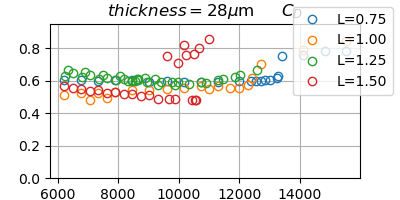

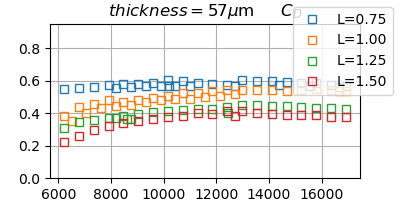

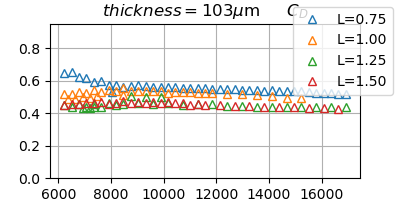

In [48]:
figs = []
for i,espesores_i in enumerate(espesores):
    figs.append(plt.subplots(figsize=(4,2)))
    #matching = [s for s in lista_results if f't{int(espesores_i*100):03d}' in s]
    figi,axi = figs[i]
    axi.set_ylim([0,0.95])
    for j,largo in enumerate(Ls[1:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        x1 = data_force['Re'][condition_dataframe]
        y1 = data_force['$\\langle$ $C_D$$\rangle$'][condition_dataframe]
         

        axi.plot(x1,y1,marker=mks[i],label=f'L={largo/D:.2f}',fillstyle='none',linestyle='')
    axi.grid()
    figi.legend()
    axi.set_title(r'$thickness=%.0f \mu $m $~~~~C_D$'%(espesores_i))

    

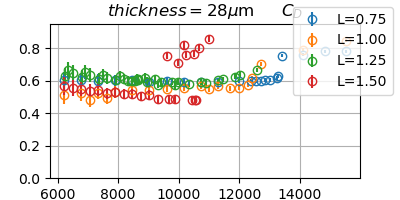

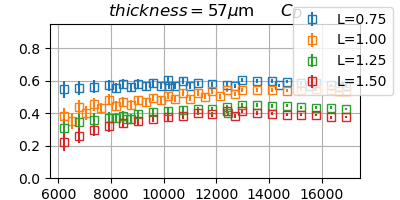

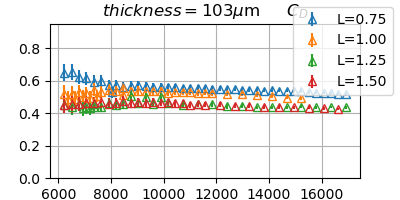

In [49]:
figs = []
for i,espesores_i in enumerate(espesores):
    figs.append(plt.subplots(figsize=(4,2)))
    #matching = [s for s in lista_results if f't{int(espesores_i*100):03d}' in s]
    figi,axi = figs[i]
    axi.set_ylim([0,0.95])
    for j,largo in enumerate(Ls[1:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        x1 = data_force['Re'][condition_dataframe]
        y1 = data_force['$\\langle$ $C_D$$\rangle$'][condition_dataframe]
        e1 = error_abs[condition_dataframe]

        axi.errorbar(x1,y1,e1,marker=mks[i],label=f'L={largo/D:.2f}',fillstyle='none',linestyle='')
    axi.grid()
    figi.legend()
    axi.set_title(r'$thickness=%.0f \mu $m $~~~~C_D$'%(espesores_i))


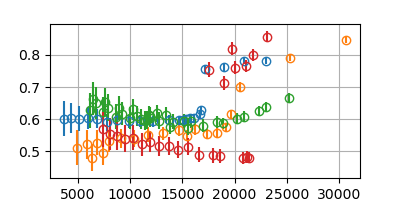

In [50]:
figs = []
for i,espesores_i in enumerate(espesores[:1]):
    figs.append(plt.subplots(figsize=(4,2)))
    #matching = [s for s in lista_results if f't{int(espesores_i*100):03d}' in s]
    figi,axi = figs[i]
    #axi.set_ylim([0,0.95])
    for j,largo in enumerate(Ls[1:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        x1 = (rho_a*U**2*L*D*2/B)[condition_dataframe]
      # x1 = (U**2*L/E)[condition_dataframe]
        y1 = (CD)[condition_dataframe]
        e1 = error_abs[condition_dataframe]

        axi.errorbar(x1,y1,e1,marker=mks[i],label=f'L={largo/D:.2f}',fillstyle='none',linestyle='')
    axi.grid()
    #figi.legend()
    #axi.set_title(r'$thickness=%.0f \mu $m $~~~~C_D$'%(espesores_i))

    

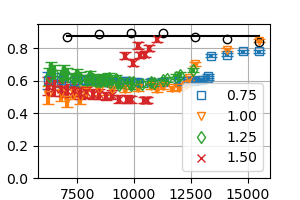

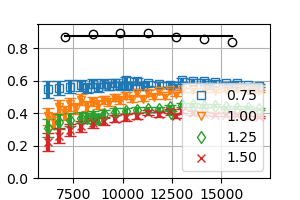

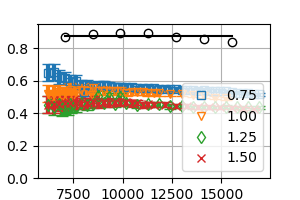

In [51]:
#dirout ='/home/juan/Documents/Publicaciones/2024FIV/article/tikzs/'
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
fig3,ax3 = plt.subplots()
ax = [ax1,ax2,ax3]
for i,Bi in enumerate(Bs[1:]):
    for k,Li in enumerate(Ls[1:]):
        y = CD[B==Bi][L==Li]
        x = Re[B==Bi][L==Li]
        e1 = error_abs[B==Bi][L==Li]
        error_bar0 = ax[i].errorbar(x,y,e1,marker=mk[k+1] ,fillstyle='none',linestyle='none',capsize=4, elinewidth=3)
        error_bar0[0].set_label(f'{Li/D:.2f}')
    ax[i].grid()
    ax[i].legend()
    y = CD[B==0]
    x = Re[B==0]
    ax[i].plot(x,y,'ko',fillstyle='none')
    ax[i].plot(x,y*y.mean()/y,'k',linestyle='-')
    ax[i].set_ylim([0,0.95])
    plt.sca(ax[i])
    savetikz(dirout+f'CD_B{Bi*1e5:.2f}.tikz')
 
    
    

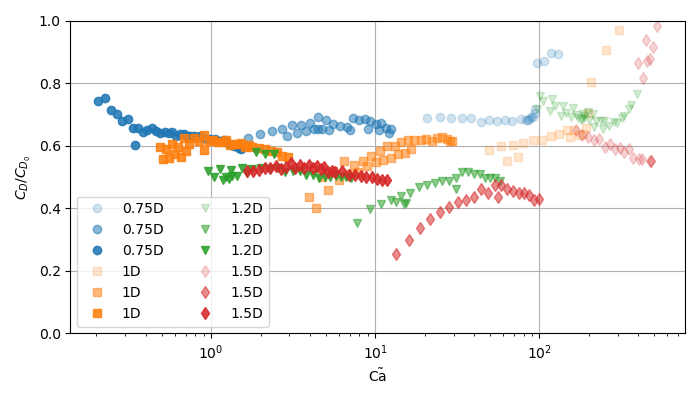

In [58]:
fig,ax = plt.subplots(figsize=(7,4))

for i,Li in enumerate(Ls[1:]):
    for j,Bi in enumerate(Bs[1:]):
        Rei = 8000
        condition = np.logical_and(np.logical_and(B==Bi,L==Li),np.abs(Re-Rei)<200)
        condition = np.logical_and(B==Bi,L==Li)
        y = (CD)[condition]/CD_ref  
        x = CY[condition]
        x2 = (Nei)[condition]
        x2 = CY[condition]
        e1 = error_abs[condition]
        #x2 = x
        #if j==2:
            #ax.semilogx(x,y,linestyle='',marker=mk[i],color=cmap(i),label=f'{Li/D:.2g}D',fillstyle='full',alpha=0.2+j/len(Bs[1:]))
        #    error_bar0 = ax.errorbar(x2,y,e1,linestyle='',marker=mk[i],color=cmap(i),fillstyle='none',alpha=1,capsize=4, elinewidth=3)#,label=f'{Li/D:.2f}')
        #    error_bar0[0].set_label(f'{Li/D:.2f}')
        #else:
            #ax.semilogx(x,y,linestyle='',marker=mk[i],color=cmap(i),fillstyle='full',alpha=0.2+j/len(Bs[1:]))
        #    ax.errorbar(x2,y,e1,linestyle='',marker=mk[i],color=cmap(i),fillstyle='none',alpha=1, capsize=4, elinewidth=3)
        ax.semilogx(x,y,linestyle='',marker=mk[i],color=cmap(i),label=f'{Li/D:.2g}D',fillstyle='full',alpha=0.2+j/len(Bs[1:]))
ax.legend(ncols=2)
ax.grid()
ax.set_xlabel(r'$\tilde {\mathrm{Ca}}$')
ax.set_ylabel('$C_D/C_{D_0}$')
ax.set_xscale('log')
ax.set_ylim([0,1])
fig.tight_layout()
#savetikz(dirout+f'Cauchy_CD.tikz')

In [53]:
dirout


'tikz_imgs/'

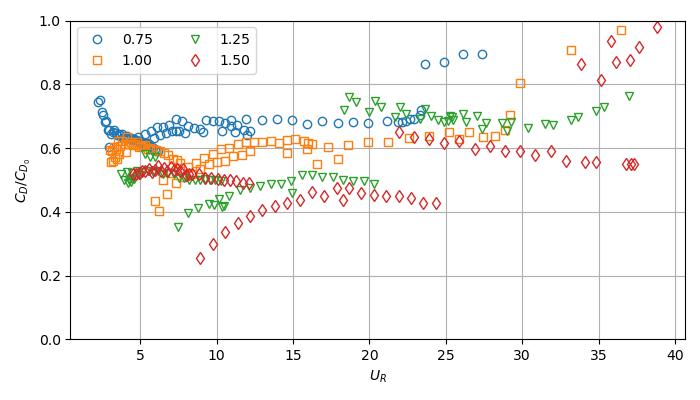

In [33]:
fig,ax = plt.subplots(figsize=(7,4))

for i,Li in enumerate(Ls[1:]):
    for j,Bi in enumerate(Bs[1:]):
        condition = np.logical_and(B==Bi,L==Li)
        
        y = (CD)[condition]/CD_ref  

        x2 = U_R2[condition]
        #x2 = x
        if j==2:
            #ax.semilogx(x,y,linestyle='',marker=mk[i],color=cmap(i),label=f'{Li/D:.2g}D',fillstyle='full',alpha=0.2+j/len(Bs[1:]))
            ax.plot(x2,y,linestyle='',marker=mk[i],color=cmap(i),fillstyle='none',alpha=1,label=f'{Li/D:.2f}')
        else:
            #ax.semilogx(x,y,linestyle='',marker=mk[i],color=cmap(i),fillstyle='full',alpha=0.2+j/len(Bs[1:]))
            ax.plot(x2,y,linestyle='',marker=mk[i],color=cmap(i),fillstyle='none',alpha=1)
ax.legend(ncols=2)
ax.grid()
ax.set_xlabel(r'$U_R$')
ax.set_ylabel('$C_D/C_{D_0}$')

ax.set_ylim([0,1])
fig.tight_layout()
#savetikz(dirout+f'Cauchy_CD.tikz')

In [ ]:

#data_force.iloc[-10:]


In [ ]:
error_abs

In [ ]:
D

In [36]:
data_force = pd.read_pickle('Force/data_total.pkl')
CD = data_force.iloc[:,4].to_numpy()
Re= data_force['Re'].to_numpy()
B = data_force['$B$'].to_numpy()
Bs = np.unique(B)
L = data_force.iloc[:,1]*D
Ls = np.unique(L)
x1,y1 = np.array([[6307,7426,8728,9264],[0.21,0.28,0.312,0.317]])
ip1 = np.polyfit(x1,y1,2)
p1 = np.poly1d(ip1)
indices_out = np.nonzero(np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<0.4).to_numpy())
#data_force = data_force = data_force.drop(axis=0,index=indices_out[0])
indices_out1 = np.nonzero(np.logical_and(np.logical_and(B == Bs[1],L == Ls[-2]),CD<0.53).to_numpy())
indices_out3 = np.nonzero(np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<p1(Re)).to_numpy())
indices_out2 = np.nonzero(Re<6100)
indices_out4 = np.nonzero(np.logical_and(Re>1.4e4,  np.logical_and(np.logical_and(B == Bs[2],L == Ls[-1]),CD<0.36)).to_numpy())
indices_out = np.hstack((indices_out1[0],indices_out2[0],indices_out3[0],indices_out4[0]))


data_force = data_force.drop(axis=0,index=indices_out)




In [37]:
 %matplotlib widget
%reload_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import glob, os
import pandas as pd
import matplotlib.ticker as mtick
from tikzplotlib import save as savetikz
from scipy import ndimage as nd
mk = ['o','s','v','d','x']
import matplotlib.patches as patches
import pickle, dill
from dshape_fastcam import caso_exp,density_mylar,flex_rig,frec_nat
from dshape_force import caso_exp_force
from dshape_hotwire import hotwire_exp

cks = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib.lines import Line2D
mks = ['o','s','^','d','<','>']
import CoolProp as cp
cmap = plt.get_cmap("tab10")
lst = np.array(['solid','dashed','dotted','dashdot'])
plt.rcParams["figure.figsize"]=(3,2)

In [38]:
for i,espesores_i in enumerate(espesores[1:2]):

    for j,largo in enumerate(Ls[3:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        y1 = data_force['$\langle$ $C_D$$\rangle$'][condition_dataframe]
        x1 = (rho_a*U**2*D*L/B)[condition_dataframe]
   

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
x1

In [ ]:
Ls

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

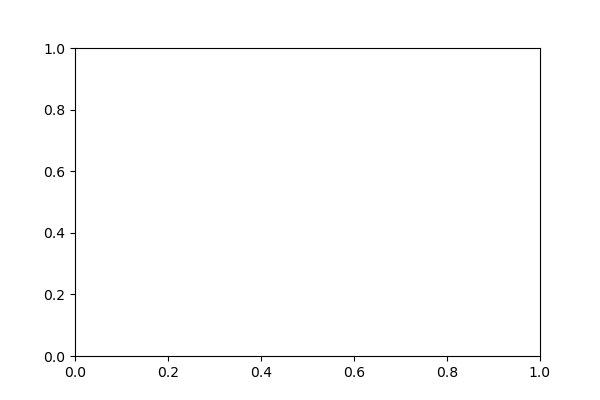

In [39]:
figs = []
for i,espesores_i in enumerate(espesores[1:2]):
    figs.append(plt.subplots(figsize=(6,4)))
    #matching = [s for s in lista_results if f't{int(espesores_i*100):03d}' in s]
    figi,axi = figs[i]
    #axi.set_ylim([0,0.95])
    for j,largo in enumerate(Ls[1:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        x1 = (rho_a*U**2*L*D*2/B)[condition_dataframe]
      # x1 = (U**2*L/E)[condition_dataframe]
        y1 = (CD)[condition_dataframe]
        e1 = error_abs[condition_dataframe]

        error_bar0 = axi.errorbar(x1,y1,e1,marker=mks[j],
                     fillstyle='none',linestyle='',capsize=10, elinewidth=3,markersize=12)
        error_bar0[0].set_label(f'{largo/D:.2f}')
    axi.grid()
    axi.legend(ncols=2,fontsize=12)
    axi.plot(900,0.3,'ko',markersize=20,fillstyle='none',markeredgewidth=3)
    #axi.set_title(r'$thickness=%.0f \mu $m $~~~~C_D$'%(espesores_i))
axi.set_xlabel('Ca',fontsize=18)
axi.set_ylabel('$C_D/C_{D0}$',fontsize=18)
figi.tight_layout()
axi.tick_params(axis='both', which='major', labelsize=14)
axi.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig(dirout+'final_cd1.png')
#savetikz(dirout+'final_cd1.tikz')    

In [40]:
dirout

'/home/juan/Documents/Publicaciones/2024FIV/tikzs/'

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

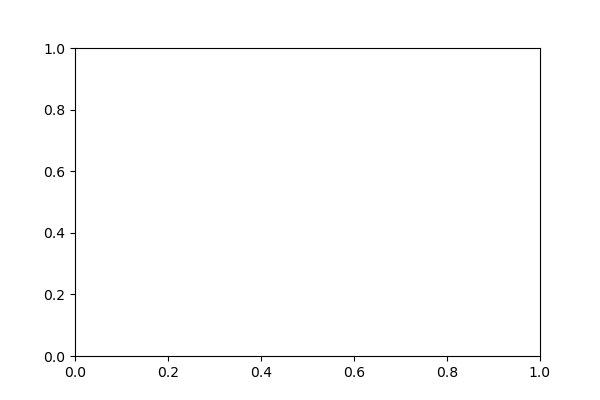

In [41]:
figs = []
for i,espesores_i in enumerate(espesores[1:2]):
    figs.append(plt.subplots(figsize=(6,4)))
    #matching = [s for s in lista_results if f't{int(espesores_i*100):03d}' in s]
    figi,axi = figs[i]
    #axi.set_ylim([0,0.95])
    for j,largo in enumerate(Ls[1:]):
        condition_dataframe = np.logical_and(data_force['$\\ell$ $/$ $D$']==largo/D, np.abs(data_force['$t$']-espesores_i)<2)
        x1 = (rho_a*U**2*L*D*2/B)[condition_dataframe]
      # x1 = (U**2*L/E)[condition_dataframe]
        y1 = (CD)[condition_dataframe]
        e1 = error_abs[condition_dataframe]

        error_bar0 = axi.errorbar(x1,y1,e1,marker=mks[j],
                     fillstyle='none',linestyle='',capsize=10, elinewidth=3,markersize=12)
        error_bar0[0].set_label(f'{largo/D:.2f}')
    axi.grid()
    axi.legend(ncols=2,fontsize=12)
    axi.plot(4090,0.38,'ko',markersize=20,fillstyle='none',markeredgewidth=3)
    #axi.set_title(r'$thickness=%.0f \mu $m $~~~~C_D$'%(espesores_i))
axi.set_xlabel('Ca',fontsize=18)
axi.set_ylabel('$C_D/C_{D0}$',fontsize=18)
figi.tight_layout()
axi.tick_params(axis='both', which='major', labelsize=14)
axi.tick_params(axis='both', which='minor', labelsize=14)
plt.savefig(dirout+'final_cd2.png')
#savetikz(dirout+'final_cd1.tikz')    